# DSC540 Final Project

Hajirah Khan and Evan Sant

# Preliminary Steps

In [1]:
#Packages used
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

import sklearn
sklearn.__version__

'1.0.2'

By looking at this dataset we are analyzing which factors contribute to whether an NBA team will have a higher conference ranking and division ranking.

In [307]:
#Import Data
nba_team = pd.read_csv('nba_team_data.csv')

In [305]:
nba_team

,team_id,w,l,pct,conf_rank,div_rank,min_year,max_year,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,32,32,0.500,8,2,1949,2022,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,45,20,0.692,2,1,1946,2022,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,40,26,0.606,4,2,1970,2022,0,22022,25,112.0,23,41.7,18,24.9,1,106.4
3,1610612740,31,33,0.484,9,3,2002,2022,0,22022,16,114.2,14,43.7,11,25.5,16,113.4
4,1610612741,29,36,0.446,12,4,1966,2022,0,22022,20,113.0,21,42.6,22,24.1,11,112.7
5,1610612742,33,32,0.508,7,2,1980,2022,0,22022,17,114.0,30,38.5,29,22.4,14,113.2
6,1610612743,45,19,0.703,1,1,1976,2022,0,22022,5,117.1,16,43.2,2,29.3,10,112.6
7,1610612744,34,31,0.523,5,3,1946,2022,0,22022,3,118.0,9,44.2,1,29.6,22,117.1
8,1610612745,15,49,0.234,15,5,1967,2022,0,22022,29,110.3,4,46.4,28,22.7,27,118.2
9,1610612746,34,33,0.507,8,4,1970,2022,0,22022,22,112.7,15,43.4,25,23.2,13,113.0


## Below is general information about the data set such as the number of rows, the number of columns, the number of variables, whether there is any missing data, and the info(), head(), and describe() methods

In [277]:
#Check for missing data
nba_team.isnull().values.any()

False

In [278]:
#General info about the dataset

#the number of observations
print("There are" , len(nba_team), "observations")
#the number of variables 
print("There are" , len(nba_team.count()), "variables")


#summary statistics
print("Summary statistics--")
print(nba_team.describe())

There are 27 observations
There are 26 variables
Summary statistics--
            team_id          w          l        pct  conf_rank   div_rank  \
count  2.700000e+01  27.000000  27.000000  27.000000  27.000000  27.000000   
mean   1.610613e+09  32.185185  32.518519   0.497556   8.111111   3.000000   
std    8.498869e+00   8.403466   8.491491   0.130914   4.466399   1.414214   
min    1.610613e+09  15.000000  18.000000   0.234000   1.000000   1.000000   
25%    1.610613e+09  29.500000  27.500000   0.457500   4.500000   2.000000   
50%    1.610613e+09  33.000000  32.000000   0.507000   8.000000   3.000000   
75%    1.610613e+09  36.500000  35.000000   0.575000  12.000000   4.000000   
max    1.610613e+09  46.000000  49.000000   0.719000  15.000000   5.000000   

          min_year  max_year  league_id  season_id   pts_rank      pts_pg  \
count    27.000000      27.0       27.0       27.0  27.000000   27.000000   
mean   1967.666667    2022.0        0.0    22022.0  15.777778  114.340741

The above code shows that there is no missing data in the dataset and that there are 27 observations and 26 variables. The summary statistics show that the minimum number of wins is 15 and the max number of wins is 46. It also shows that the minimum points per game is about 108 and and the maximum is about 121. It also shows that the maximum conference rank is 15 which is what we'll be looking at. 

## Next is some Exploratory Data Analysis: histograms, scatterplots, and lm plots.

<AxesSubplot:xlabel='w', ylabel='Count'>

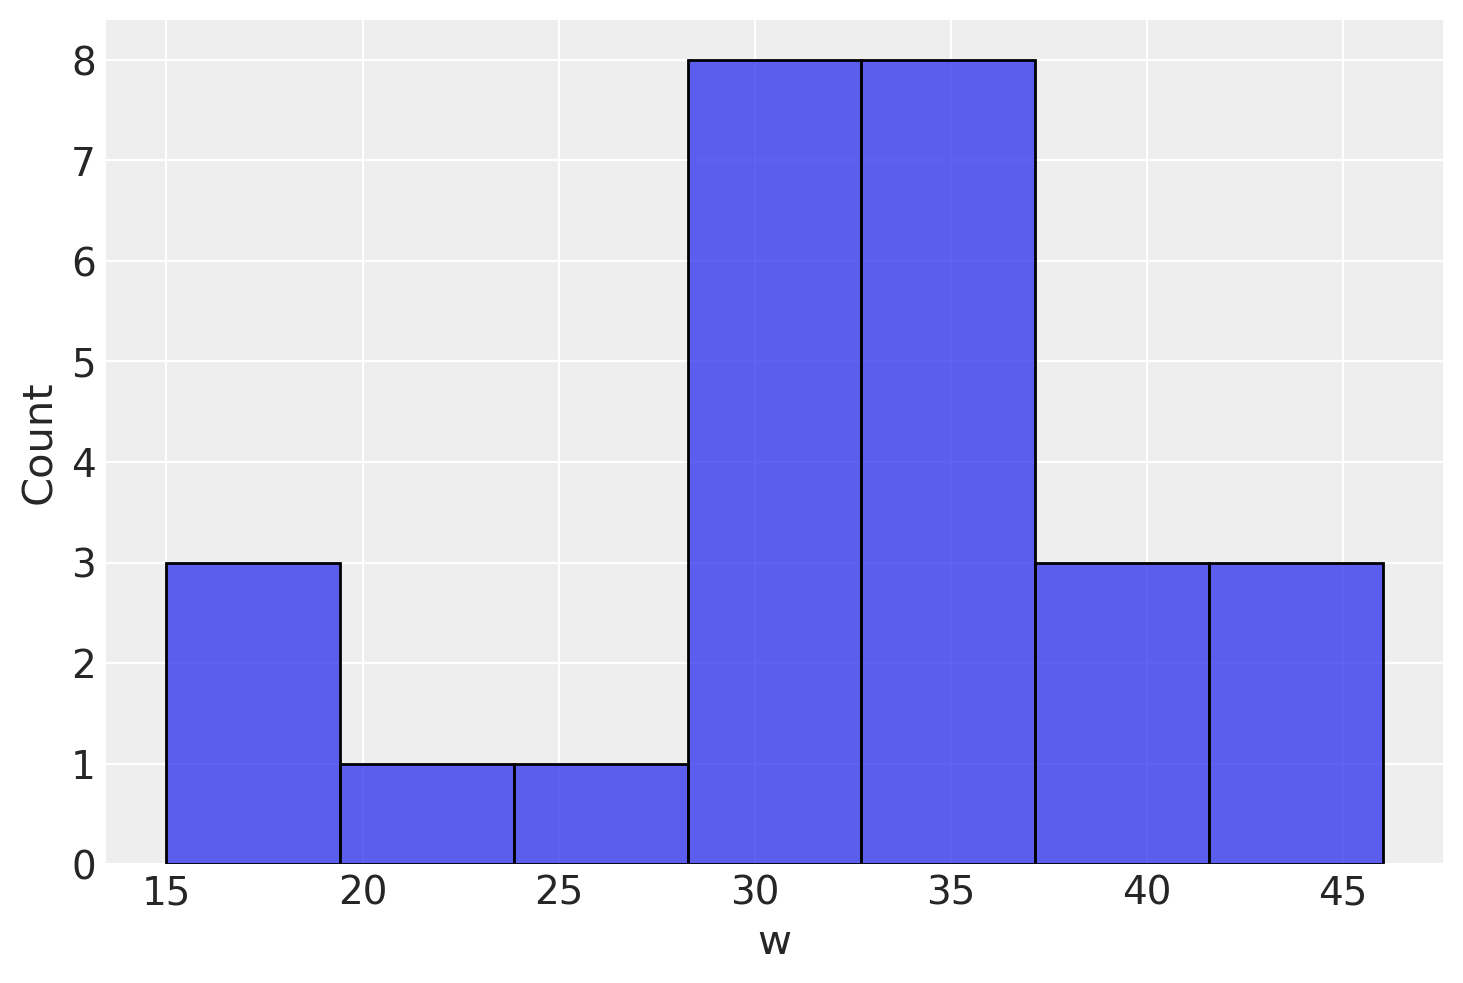

In [279]:
#Code here
#Histogram
sns.histplot(data=nba_team, x="w")

<AxesSubplot:xlabel='w', ylabel='pts_pg'>

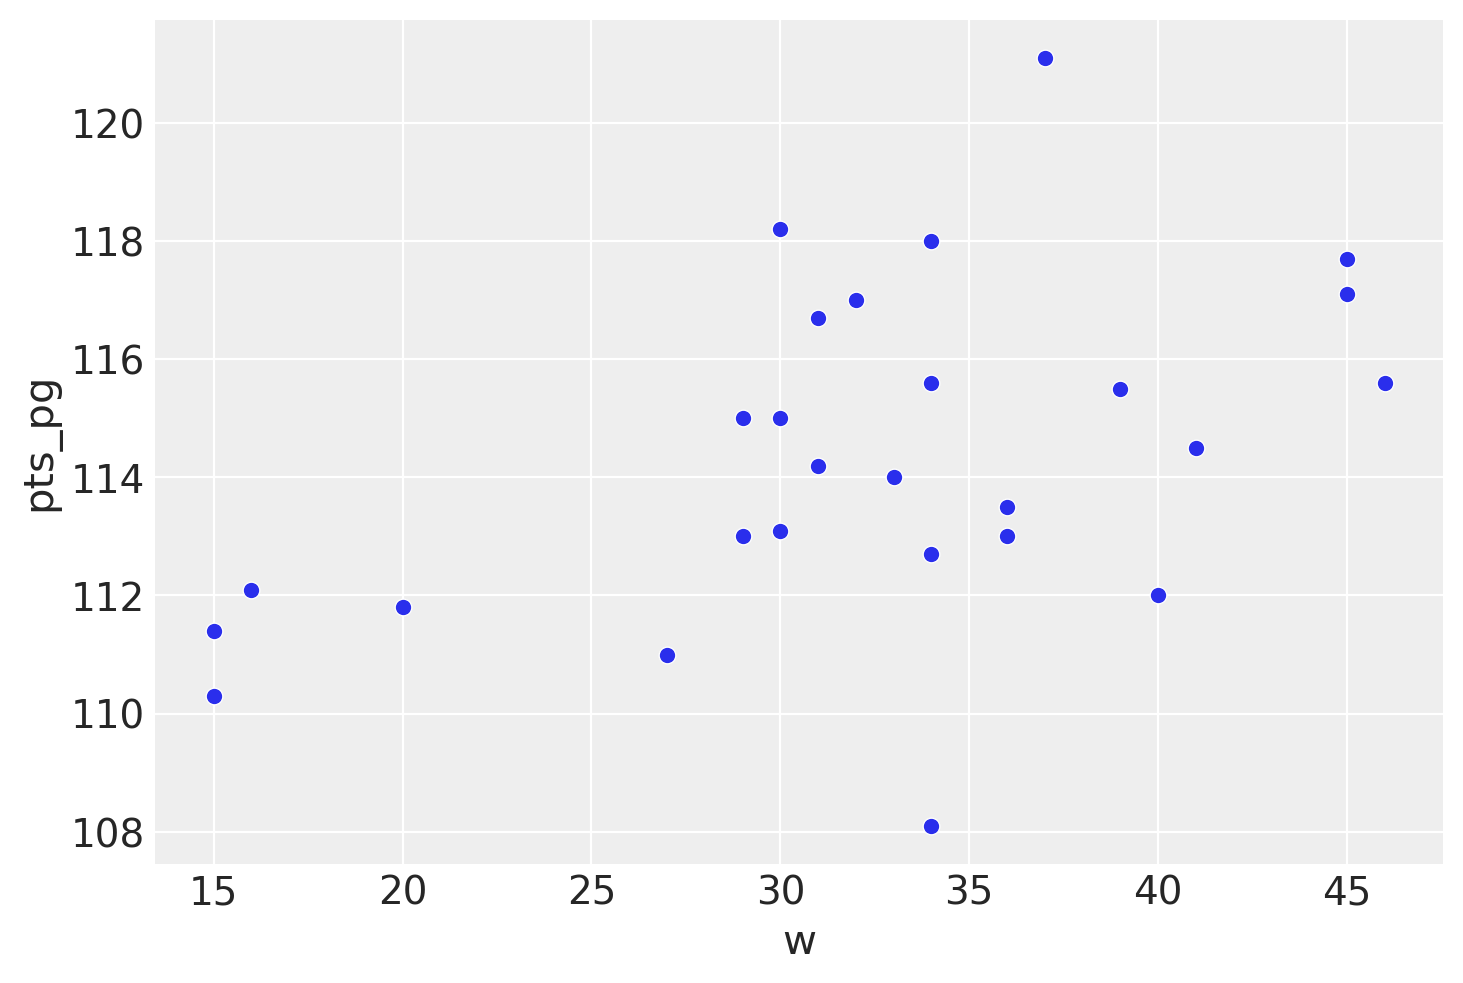

In [280]:
#Scatterplot
sns.scatterplot(data=nba_team, x="w", y="pts_pg")

<AxesSubplot:xlabel='conf_rank', ylabel='pts_pg'>

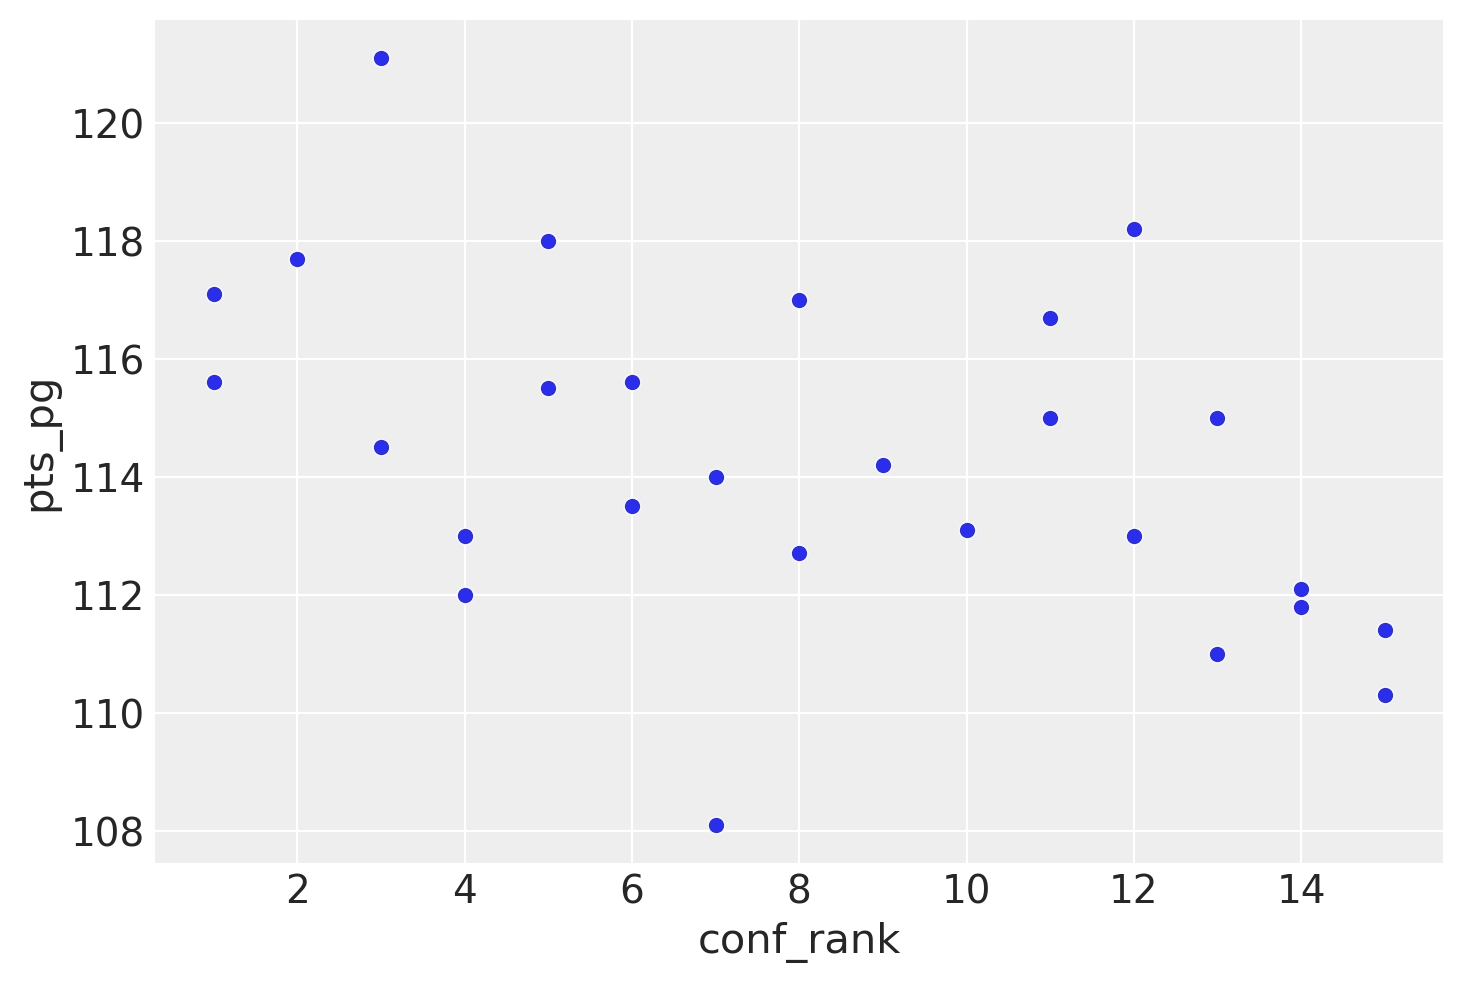

In [281]:
sns.scatterplot(data=nba_team, x="conf_rank", y="pts_pg")

<AxesSubplot:xlabel='w', ylabel='pts_rank'>

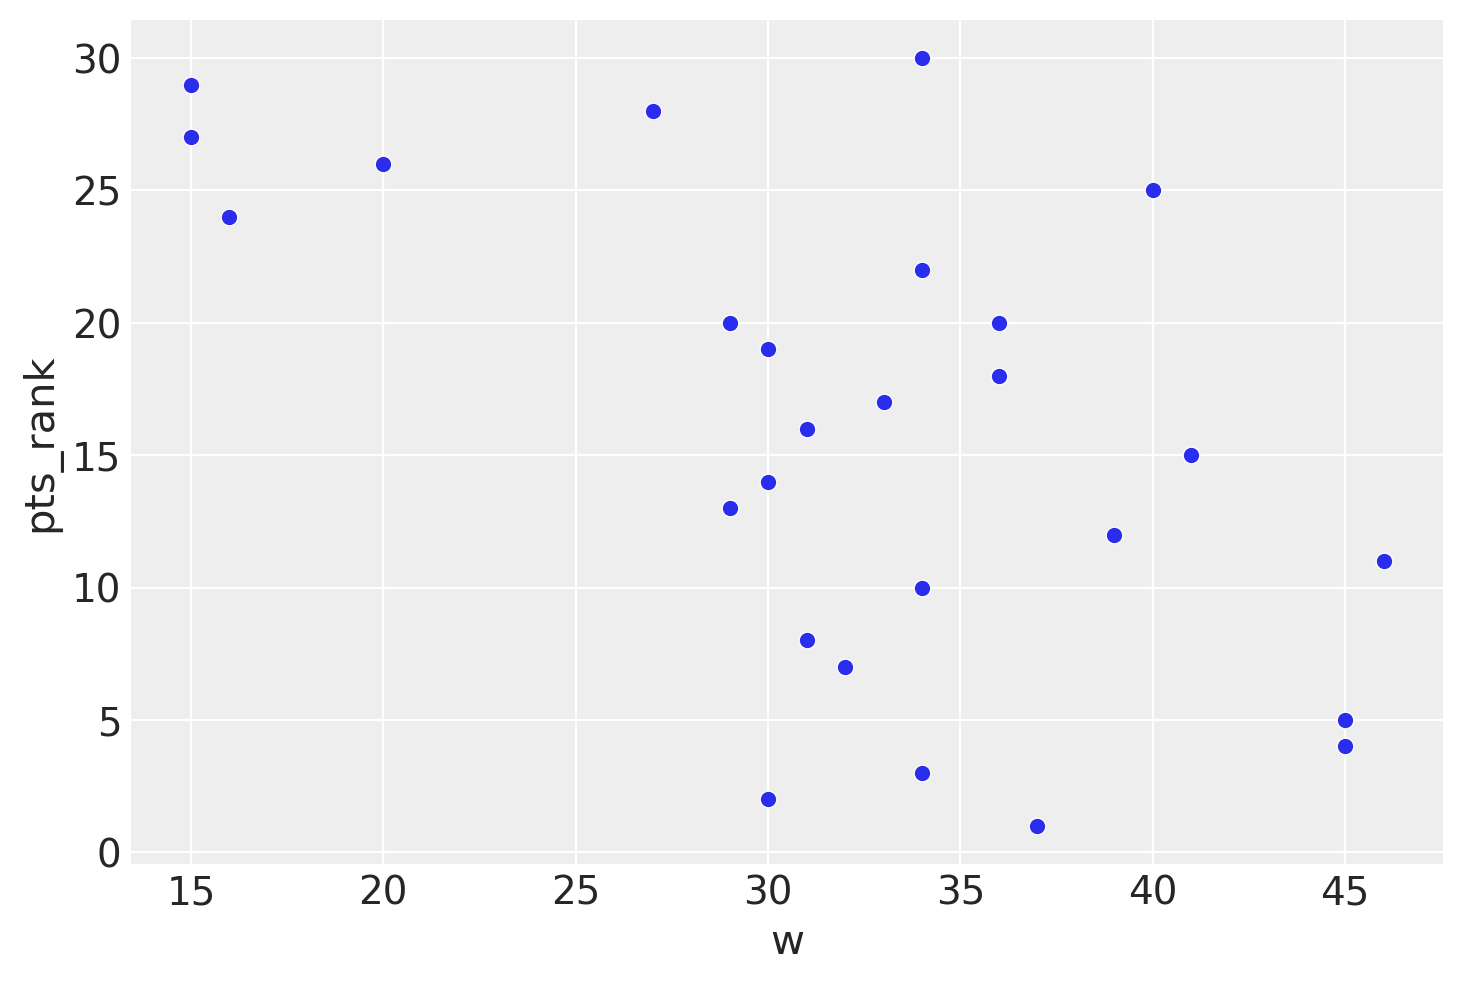

In [282]:
sns.scatterplot(data=nba_team, x="w", y="pts_rank")

<AxesSubplot:xlabel='conf_rank', ylabel='pts_rank'>

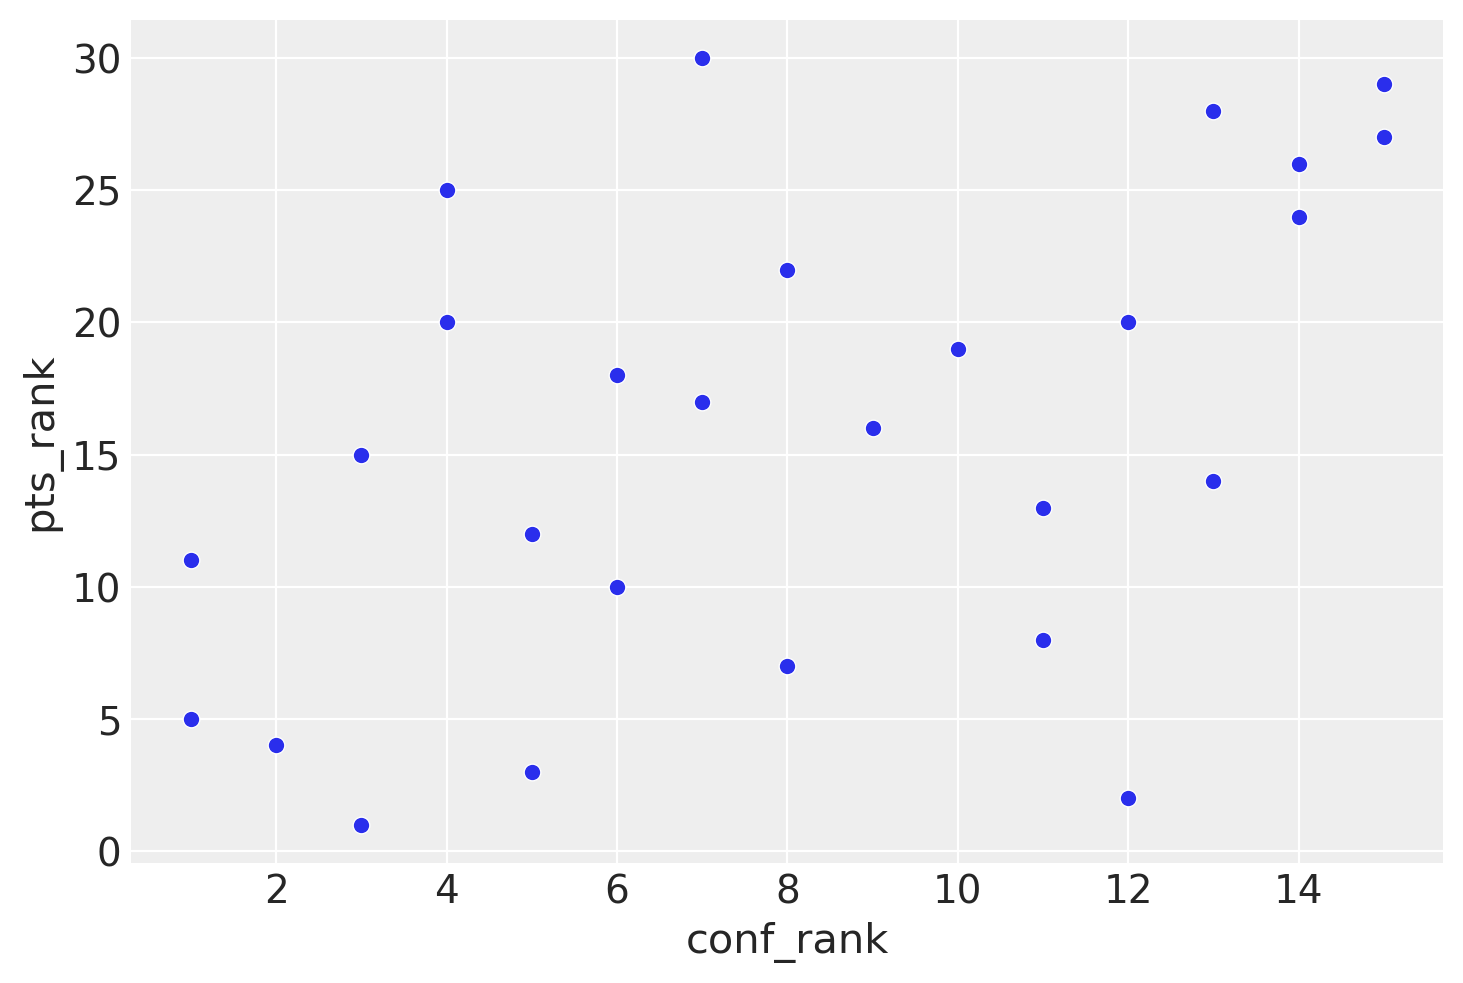

In [283]:
sns.scatterplot(data=nba_team, x="conf_rank", y="pts_rank")

By looking at the scatterplots above we can see that there is no correlation between the conference rank and the points rank and the conference rank and the points per game. There is a negative correlation between the points rank and the number of wins, as the number of wins increases the points rank decreases. There is a positive correlation between the number of wins and the points per game, as the points per game increases so does the number of wins. The histogram above shows the number of wins, it shows that most teams win record is around 30-35 wins. 

# Model Creation and Scoring

## Predicting Conference Rankings With Decision Trees

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [156]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('conf_rank', axis=1)
y = df.conf_rank

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

In [158]:
dt = DecisionTreeClassifier()

In [159]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [160]:
y_pred = dt.predict(X_test)
y_pred

array([ 1, 13,  5,  3, 14,  4], dtype=int64)

In [161]:
metrics.accuracy_score(y_test, y_pred)

0.16666666666666666

In [162]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1

    accuracy                           0.17         6
   macro avg       0.10      0.10      0.10         6
weighted avg       0.17      0.17      0.17         6



In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [164]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

In [165]:
scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.18181818 0.1       ]


In [166]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.141 +/- 0.041


In [167]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]
scores_params = []
for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
    scores_params.append(scores.mean())

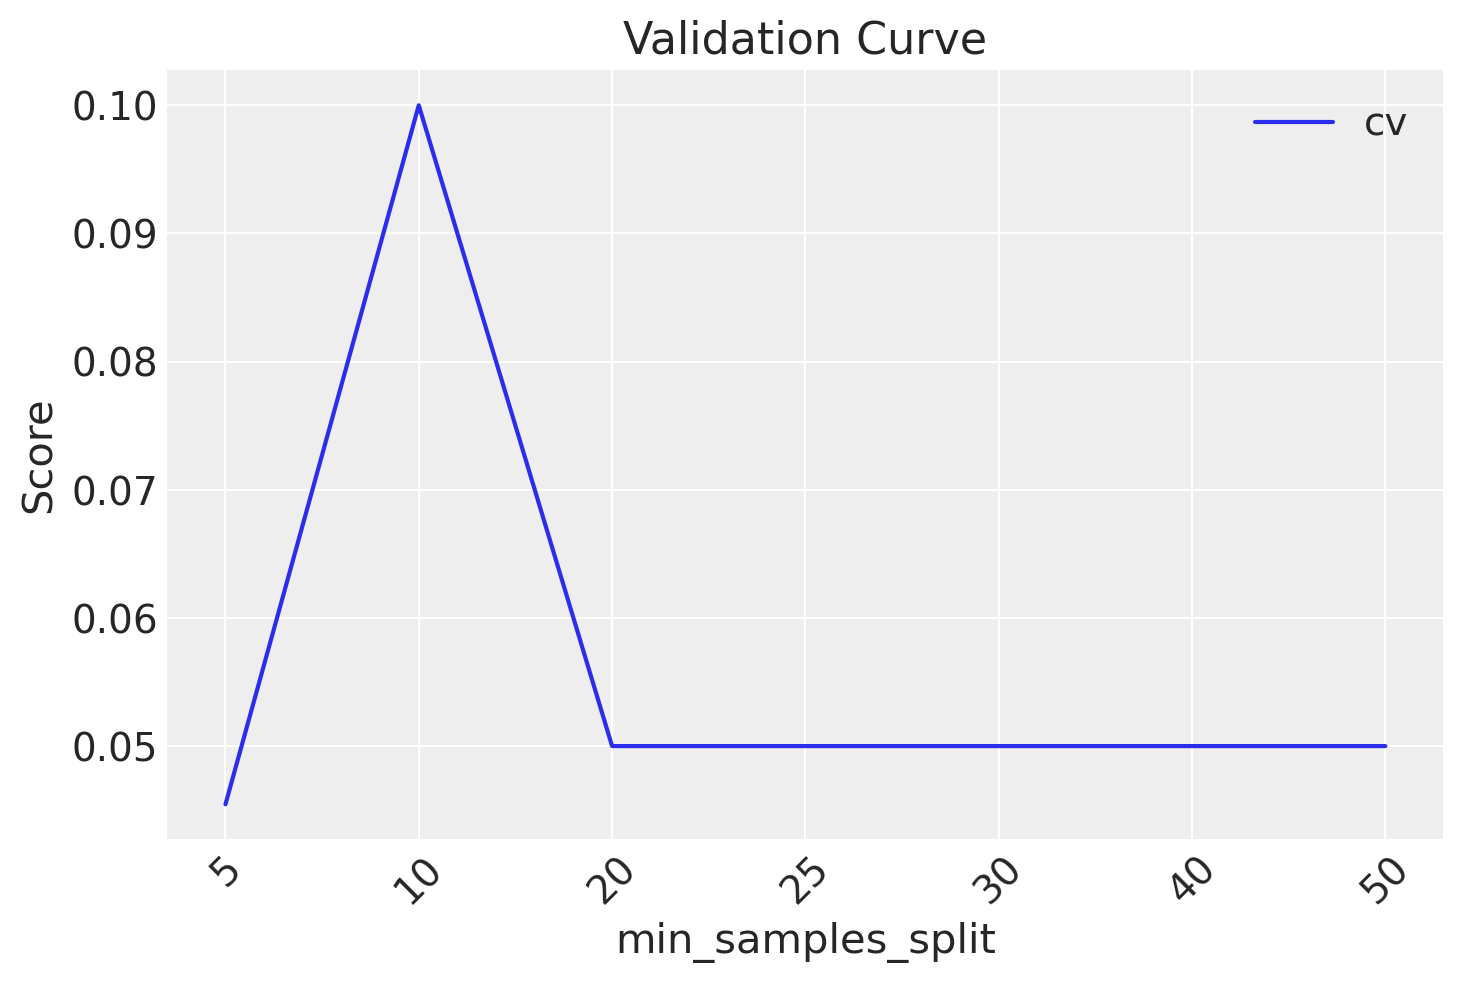

In [168]:
plt.plot(scores_params, label = 'cv')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

The model got a score of .17. This is a low accuracy score. It was able to predict teams that would rank fourteenth  in the conference with an accuracy of .67 but unable to do that with the rest of the rankings. When looking at the validation curve we can see that as we increase our minimum samples the score increases to when between five and ten, decreases when between 10 and 20. and then stays the same when greater than 20. It would seem that 10 samples is our best option. 

## Predicting Divison Rankings With Decision Trees

In [182]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('div_rank', axis=1)
y = df.div_rank

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

In [210]:
dt = DecisionTreeClassifier()

In [248]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [253]:
y_pred = dt.predict(X_test)
y_pred

array([2, 4, 3, 3, 4, 2], dtype=int64)

In [256]:
metrics.accuracy_score(y_test, y_pred)

0.3333333333333333

In [257]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.20      0.40      0.27         6
weighted avg       0.17      0.33      0.22         6



In [258]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

In [259]:
scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.09090909 0.3       ]


In [260]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.195 +/- 0.105


In [261]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [262]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]
scores_params = []
for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
    scores_params.append(scores.mean())

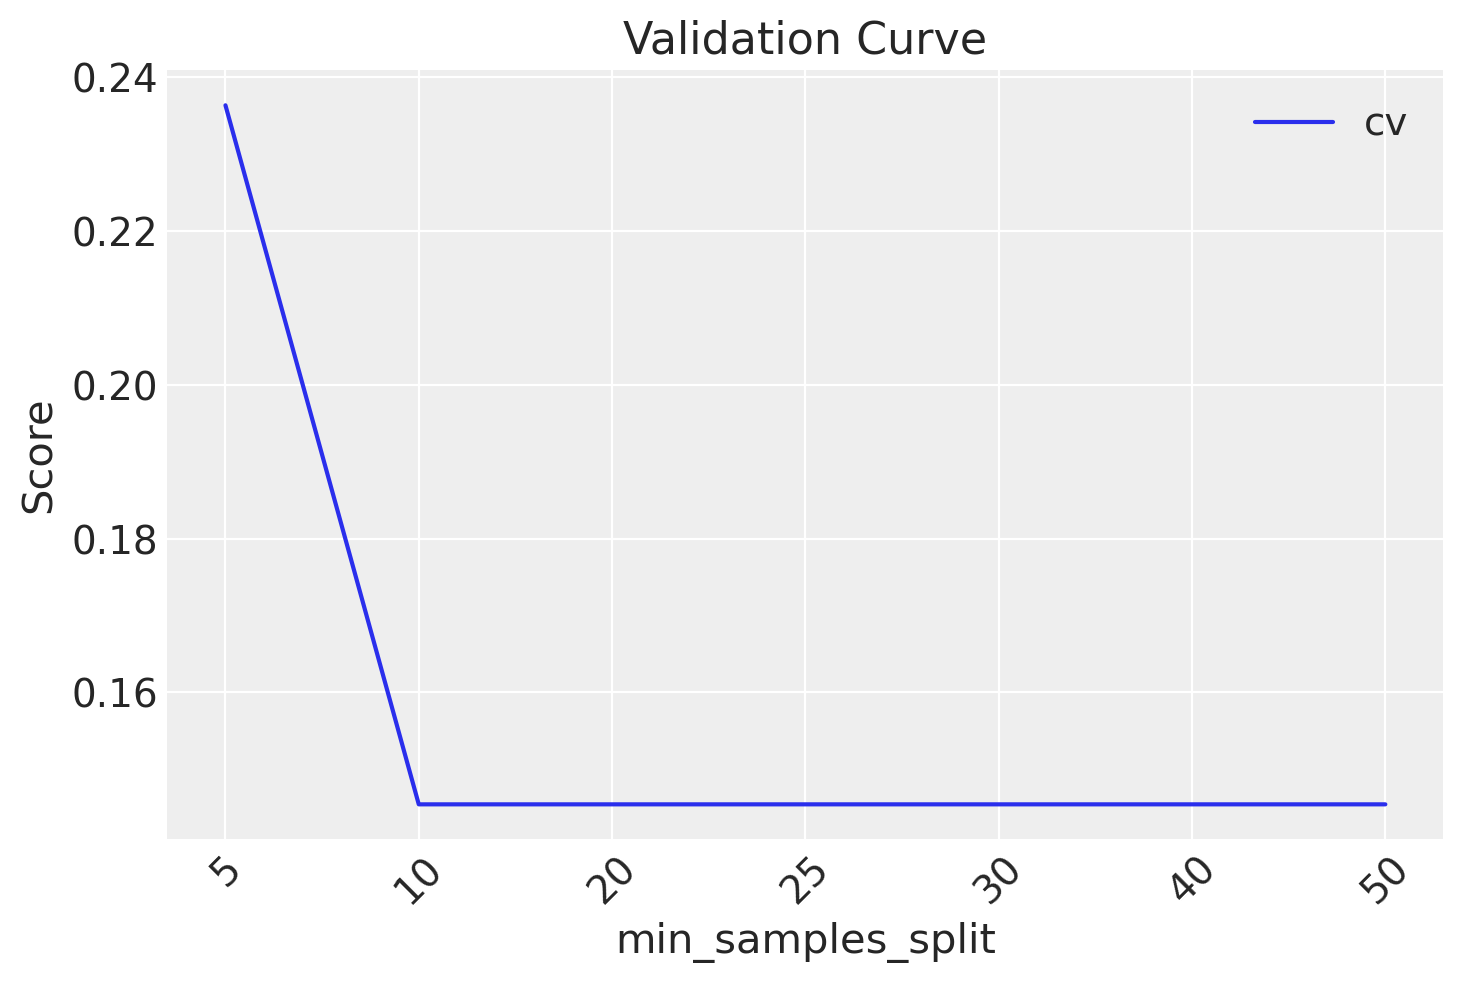

In [263]:
plt.plot(scores_params, label = 'cv')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

The model got a score of .33. This is a moderate to low accuracy score. It was able to predict teams that would rank second or fourth in the division with an accuracy of .67 but unable to do that with the rest of the rankings. When looking at the validation curve we can see that as we increase our minimum samples the score decreases. It would seem that 5 samples is our best option. 

## Predicting Conference Rankings with  Random Forest

In [264]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('conf_rank', axis=1)
y = df.conf_rank

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

In [266]:
def fit_predict_score(name,clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
    plt.show()
    print (metrics.classification_report(y_test,predicted))

In [267]:
from sklearn.ensemble import RandomForestClassifier

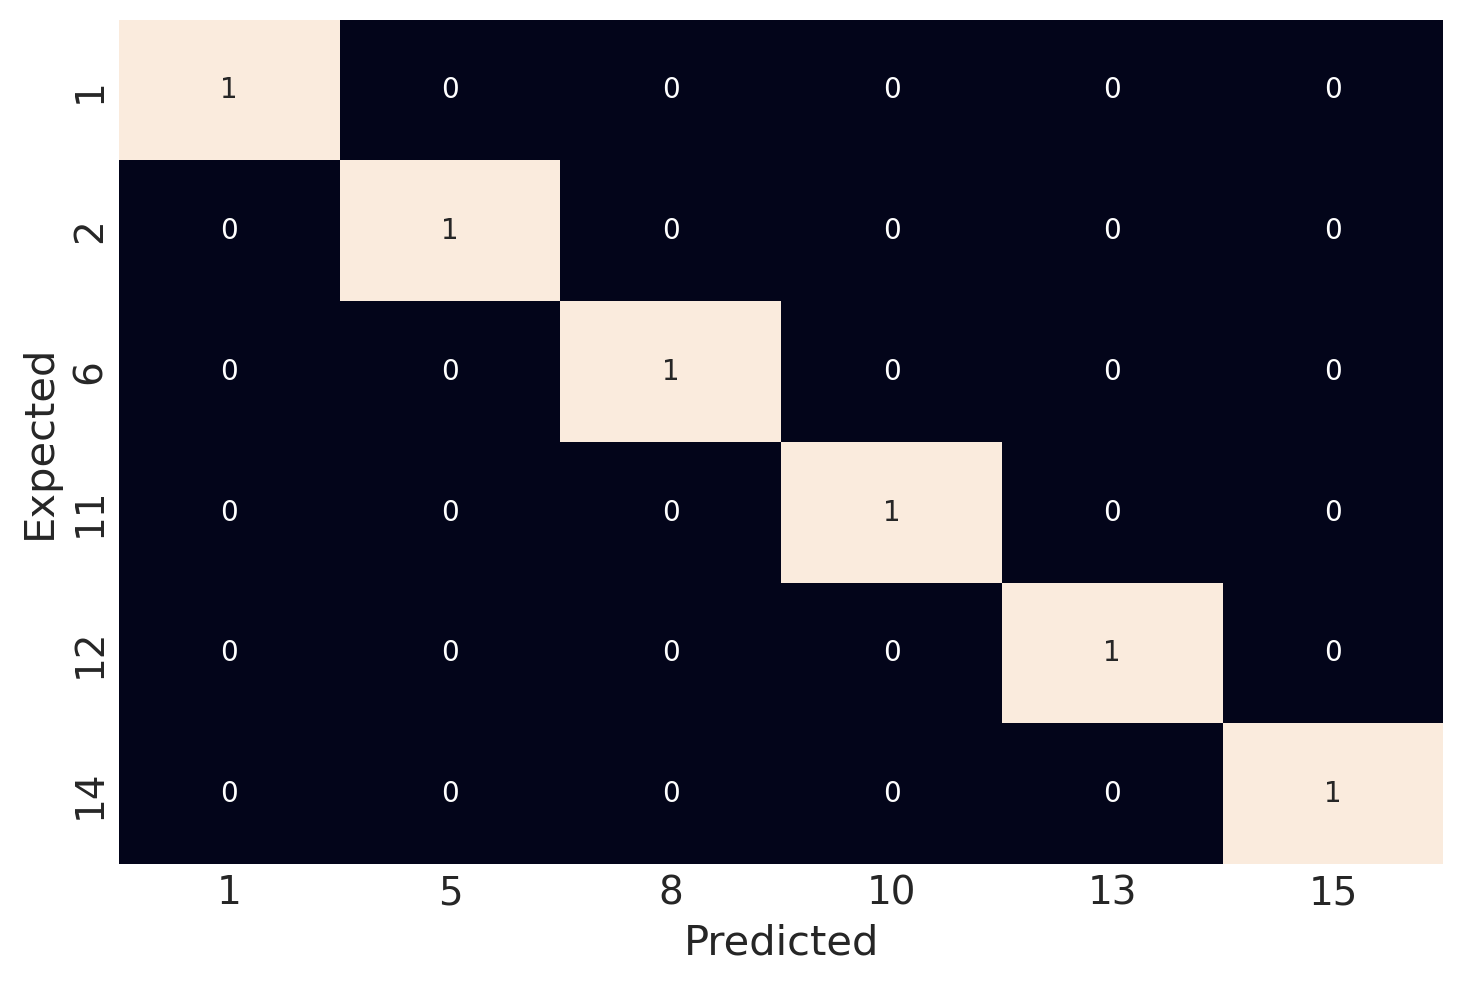

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0

    accuracy                           0.17         6
   macro avg       0.09      0.09      0.09         6
weighted avg       0.17      0.17      0.17         6



In [268]:
clf = RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier
fit_predict_score(rf,clf)

When using random forest we get very similar results as with decision trees. With conference rankings we get an accuracy score of 0.17. It was able to prefectly predict who would be the first place team which would be the most important position to predict. However, when trying to predict any other position it isn't able to do so. Additionally, when we look at the confusion matrix we see that there it is able to predict position 1 correctly, and then it seems to be quite off when predicting position 2 and 6. However when trying to get position 11, 12, and 14 it is only off by 1. 

## Predicting Division Rankings with  Random Forest

In [270]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('div_rank', axis=1)
y = df.div_rank

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

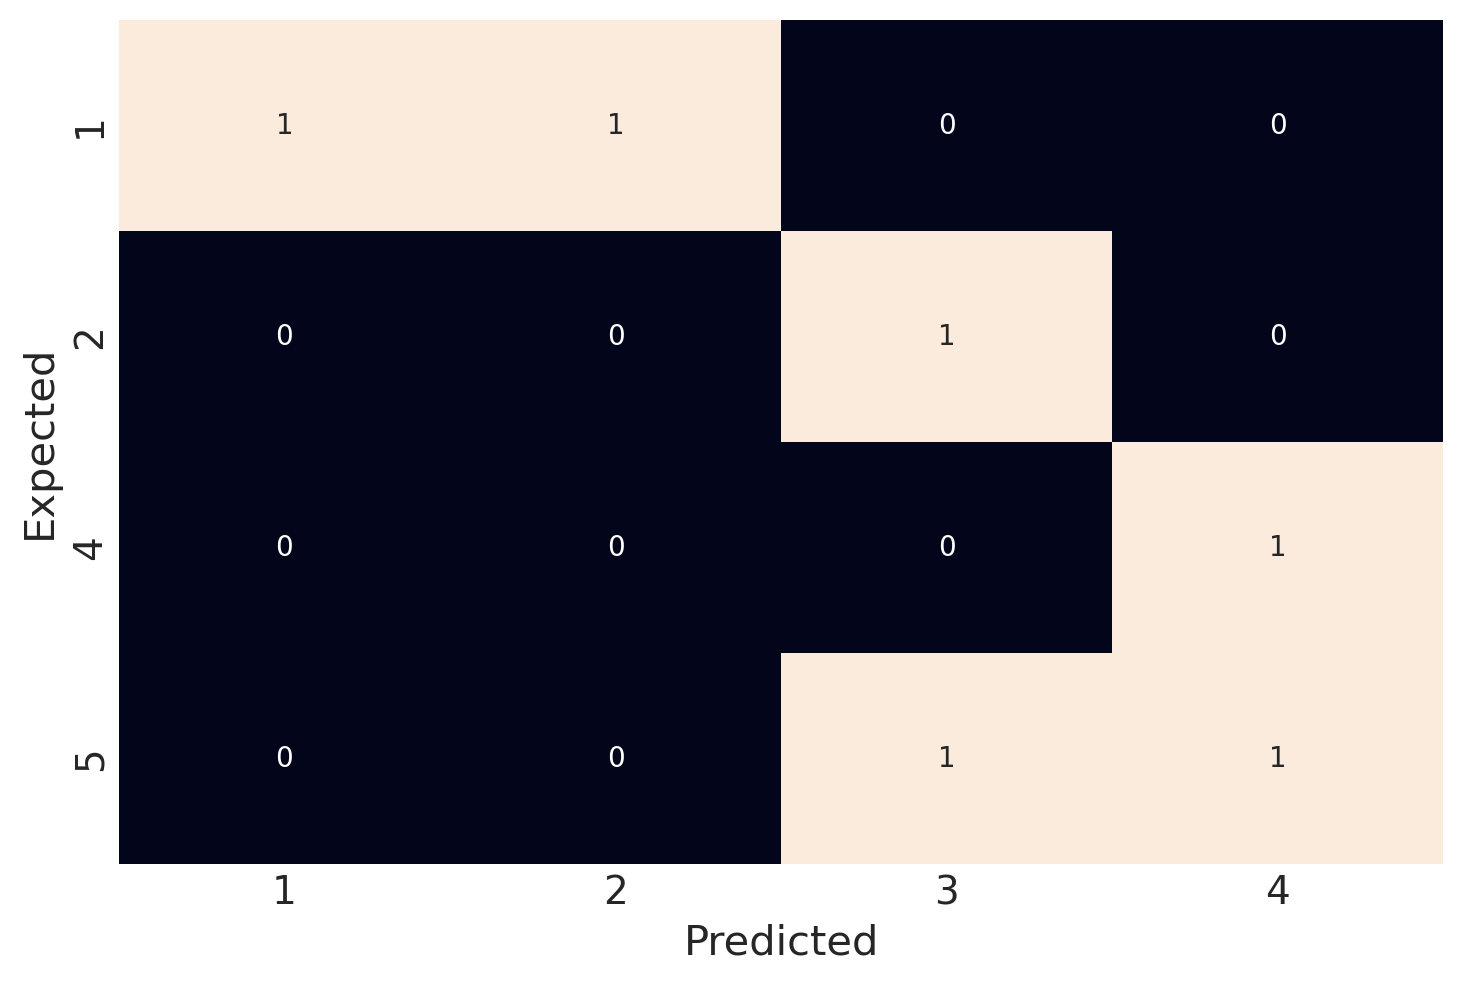

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.30      0.30      0.27         6
weighted avg       0.42      0.33      0.33         6



In [272]:
clf = RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier
fit_predict_score(rf,clf)

When using random forest we get very similar results as with decision trees in division rankings as well. With division rankings we get an accuracy score of 0.33. It was able to  predict who would be ranked first and fourth with an accuracy of 0.67. However, when trying to predict any other position it isn't able to do so. Additionally, when we look at the confusion matrix we see that it overpredicted in rank 1 and 5. Unfortunately being off by 1 or 2 ranks in these scenarios is worse than in the conference predictions as there are only 5 positions that one can be in compared to 15. 

## Pick 1 or 2 of the following: Linear regression, Random Forest regression, Linear kernel SVR, Polynomial kernel SVR, RBF kernel SVR 

## Conference Rankings Using Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [275]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('conf_rank', axis=1)
y = df.conf_rank

In [276]:
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9559860494201837

## Division Rankings Using Linear Regression

In [273]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('div_rank', axis=1)
y = df.div_rank

In [274]:
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.8065018775777144

When using linear regression we can see that the data does an excellent job of predicting conference and division rankings. For conference rankings we achieved a score of 95.6. This shows that the model did an incredible job of predicting the conference rankings. As for the division rankings the model was able to get a score of 80.7. While the score is not as good as the conference rankings score it still does a very good job of predicting the division rankings. When trying to predict wins it is able to acheive a score of 0.9997. This essentially can prefectly predict wins. 

## Wins Using Linear Regression

In [308]:
df = nba_team.drop(['season_year','team_city','team_name','team_abbreviation','team_conference','team_division','team_code','team_slug'],axis=1)
X = df.drop('w', axis=1)
y = df.w

In [309]:
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.9997219402110014

## Adaboost classifer model, number of wins in a season ('w') is what we are trying to predict. 

In [284]:
nba_team = nba_team.drop('team_city',axis=1)

In [285]:
#team_city	team_name	team_abbreviation	team_conference	team_division	team_code	team_slug
nba_team = nba_team.drop('team_name',axis=1)

In [286]:
nba_team = nba_team.drop('team_abbreviation',axis=1)

In [287]:
nba_team = nba_team.drop('team_conference',axis=1)

In [288]:
nba_team = nba_team.drop('team_division',axis=1)

In [289]:
nba_team = nba_team.drop('team_code',axis=1)

In [290]:
nba_team = nba_team.drop('team_slug',axis=1)

In [296]:
nba_team = nba_team.drop('season_year',axis=1)

In [297]:
nba_team

,team_id,w,l,pct,conf_rank,div_rank,min_year,max_year,league_id,season_id,pts_rank,pts_pg,reb_rank,reb_pg,ast_rank,ast_pg,opp_pts_rank,opp_pts_pg
0,1610612737,32,32,0.500,8,2,1949,2022,0,22022,7,117.0,12,43.7,20,24.6,21,116.9
1,1610612738,45,20,0.692,2,1,1946,2022,0,22022,4,117.7,6,45.2,7,26.3,9,112.4
2,1610612739,40,26,0.606,4,2,1970,2022,0,22022,25,112.0,23,41.7,18,24.9,1,106.4
3,1610612740,31,33,0.484,9,3,2002,2022,0,22022,16,114.2,14,43.7,11,25.5,16,113.4
4,1610612741,29,36,0.446,12,4,1966,2022,0,22022,20,113.0,21,42.6,22,24.1,11,112.7
5,1610612742,33,32,0.508,7,2,1980,2022,0,22022,17,114.0,30,38.5,29,22.4,14,113.2
6,1610612743,45,19,0.703,1,1,1976,2022,0,22022,5,117.1,16,43.2,2,29.3,10,112.6
7,1610612744,34,31,0.523,5,3,1946,2022,0,22022,3,118.0,9,44.2,1,29.6,22,117.1
8,1610612745,15,49,0.234,15,5,1967,2022,0,22022,29,110.3,4,46.4,28,22.7,27,118.2
9,1610612746,34,33,0.507,8,4,1970,2022,0,22022,22,112.7,15,43.4,25,23.2,13,113.0


In [298]:
X = nba_team.drop('w',axis=1)
y = nba_team['w']

In [299]:
from sklearn.model_selection import train_test_split
#split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [300]:
#Adaboost
#code here
from sklearn.ensemble import AdaBoostClassifier
# initiate Ada Boost classifier
ab = AdaBoostClassifier()
# fit the model
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [301]:
# make predictions
y_pred = ab.predict(X_test)
y_pred
#performance metrics for validation set
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          15       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         3
          45       1.00      1.00      1.00         1

    accuracy                           0.33         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.33      0.33      0.33         6



In [302]:
#min_sample_split and max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create parameters dictionary
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
)

params

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# Inititate grid search
gs = GridSearchCV(estimator=ab, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs

#metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          15       1.00      1.00      1.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         3
          45       1.00      1.00      1.00         1

    accuracy                           0.33         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.33      0.33      0.33         6



In [303]:
y_pred

array([30, 15, 31, 45, 30, 31], dtype=int64)

Adaboost explanation:
From the above output we can see that the accuracy is 33% which is relatively low in terms of being able to predict the number of wins a given NBA team has. We can see that the model is able to correctly predict the number of wins for teams with 15 wins but for teams with a higher number of wins the prediction model isn't able to correctly predict the number of wins.  

# Conclusions

We found that while random forest, decision trees, and adaboost can do a moderate job of predicting division rankings and wins, they don't work very well for predicting conference rankings. The best models we could achieve could only produce an accuracy rating of around 0.33. At their worst they would produce an accuracy rating ofd 0.17. When using linear regression we found that the models did a much better job. We were able to predict conference rankings as well as wins almost perfectly with scores being in the upper 0.9s. As well, the division rankings weren't able to be predicted as well but the model still had an accuracy score ofd 0.8. 